# Avaliação Prática – Análise Econômica e Criptofinanceira com Alpha Vantage (Câmbio e Bitcoin)

## Pré-Processamento de Dados

### Importação de Bibliotecas

In [270]:
!pip install plotly --upgrade

In [271]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Consumo da API Alpha Vantage para Carregamento das Fontes de Dados e Conversão para Pandas Dataframe

#### Função "FX_DAILY" da API para Consumo de Dados sobre Câmbio USD/BRL

In [273]:
url_fx_currency = 'https://www.alphavantage.co/query?function=FX_DAILY&outputsize=full&from_symbol=USD&to_symbol=BRL&apikey=NES1FN2QJITLR295'

In [274]:
r = requests.get(url_fx_currency)

In [275]:
data = r.json()

In [276]:
fx_time_series = data['Time Series FX (Daily)']
fx_df = pd.DataFrame.from_dict(fx_time_series, orient='index')
fx_df.index = pd.to_datetime(fx_df.index)
fx_df = fx_df.sort_index()
fx_df

,1. open,2. high,3. low,4. close
2014-11-07,2.55730,2.58100,2.55630,2.55900
2014-11-10,2.56400,2.57150,2.53250,2.55250
2014-11-11,2.56450,2.56600,2.55690,2.56450
2014-11-12,2.56450,2.56670,2.53510,2.56670
2014-11-13,2.56550,2.60420,2.56000,2.59430
...,...,...,...,...
2025-04-23,5.72010,5.72750,5.65680,5.71110
2025-04-24,5.71110,5.71160,5.66090,5.68150
2025-04-25,5.68150,5.70690,5.66360,5.68880
2025-04-28,5.68650,5.69940,5.64550,5.65370


#### Função "DIGITAL_CURRENCY_DAILY" da API para Consumo de Dados de Bitcoin em EUR

In [277]:
url_btc = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=EUR&apikey=NES1FN2QJITLR295'

In [278]:
r = requests.get(url_btc)

In [279]:
data = r.json()

In [280]:
btc_time_series = data['Time Series (Digital Currency Daily)']
btc_df = pd.DataFrame.from_dict(btc_time_series, orient='index')
btc_df.index = pd.to_datetime(btc_df.index)
btc_df = btc_df.sort_index()
btc_df

,1. open,2. high,3. low,4. close,5. volume
2024-05-15,56924.68000000,61022.00000000,56680.09000000,60777.05000000,383.64791289
2024-05-16,60779.28000000,61400.00000000,59000.00000000,60018.57000000,394.26686267
2024-05-17,60030.50000000,62081.49000000,59963.62000000,61687.99000000,323.11749946
2024-05-18,61685.45000000,62012.19000000,61300.00000000,61579.64000000,194.99132039
2024-05-19,61588.52000000,62261.43000000,60587.46000000,60927.75000000,202.69537382
...,...,...,...,...,...
2025-04-25,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951
2025-04-26,83363.19000000,83817.46000000,82678.95000000,83339.36000000,95.09650952
2025-04-27,83346.93000000,83936.81000000,82439.60000000,82679.76000000,94.27200693
2025-04-28,82686.69000000,84249.00000000,81776.11000000,83320.25000000,232.89022484


#### Unificação das Fontes de Dados por Alinhamento Temporal por Data

In [281]:
fx_btc_df = pd.merge(fx_df, btc_df, left_index=True, right_index=True, how='inner')
fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume
2024-05-15,5.12930,5.17000,5.11210,5.13480,56924.68000000,61022.00000000,56680.09000000,60777.05000000,383.64791289
2024-05-16,5.13940,5.13980,5.10440,5.12960,60779.28000000,61400.00000000,59000.00000000,60018.57000000,394.26686267
2024-05-17,5.12830,5.13780,5.09960,5.10400,60030.50000000,62081.49000000,59963.62000000,61687.99000000,323.11749946
2024-05-20,5.10290,5.12860,5.09000,5.10830,60930.51000000,65700.00000000,60750.00000000,65521.16000000,542.13763679
2024-05-21,5.10830,5.12480,5.08340,5.11450,65521.16000000,65933.02000000,63494.57000000,64375.99000000,628.58154046
...,...,...,...,...,...,...,...,...,...
2025-04-23,5.72010,5.72750,5.65680,5.71110,82339.52000000,83264.20000000,80800.00000000,82718.26000000,490.53056792
2025-04-24,5.71110,5.71160,5.66090,5.68150,82741.42000000,82860.82000000,80606.52000000,82682.47000000,227.68974180
2025-04-25,5.68150,5.70690,5.66360,5.68880,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951
2025-04-28,5.68650,5.69940,5.64550,5.65370,82686.69000000,84249.00000000,81776.11000000,83320.25000000,232.89022484


### Aplicação de Requisitos da Prova

#### Filtro do Dataframe para Últimos 90 Dias

In [282]:
fx_btc_df = fx_btc_df.tail(90)
fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume
2024-12-25,6.19060,6.19060,6.19060,6.19060,94890.99000000,95737.17000000,93915.29000000,95615.60000000,219.22545179
2024-12-26,6.17380,6.19770,6.14580,6.18280,95618.45000000,96129.98000000,91380.00000000,91817.68000000,278.73491900
2024-12-27,6.17110,6.21480,6.16890,6.20110,91774.04000000,93579.09000000,89634.61000000,90412.16000000,373.71835226
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032
2024-12-31,6.18400,6.19500,6.17780,6.18400,89007.78000000,92638.09000000,88252.45000000,90119.83000000,397.73855381
...,...,...,...,...,...,...,...,...,...
2025-04-23,5.72010,5.72750,5.65680,5.71110,82339.52000000,83264.20000000,80800.00000000,82718.26000000,490.53056792
2025-04-24,5.71110,5.71160,5.66090,5.68150,82741.42000000,82860.82000000,80606.52000000,82682.47000000,227.68974180
2025-04-25,5.68150,5.70690,5.66360,5.68880,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951
2025-04-28,5.68650,5.69940,5.64550,5.65370,82686.69000000,84249.00000000,81776.11000000,83320.25000000,232.89022484


#### Renomeação dos Atributos

In [283]:
fx_btc_df = fx_btc_df.rename(columns={
    '1. open_x': 'fx_open',
    '2. high_x': 'fx_high',
    '3. low_x': 'fx_low',
    '4. close_x': 'fx_close',
    '1. open_y': 'btc_open',
    '2. high_y': 'btc_high',
    '3. low_y': 'btc_low',
    '4. close_y': 'btc_close',
    '5. volume': 'btc_volume'
})
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume
2024-12-25,6.19060,6.19060,6.19060,6.19060,94890.99000000,95737.17000000,93915.29000000,95615.60000000,219.22545179
2024-12-26,6.17380,6.19770,6.14580,6.18280,95618.45000000,96129.98000000,91380.00000000,91817.68000000,278.73491900
2024-12-27,6.17110,6.21480,6.16890,6.20110,91774.04000000,93579.09000000,89634.61000000,90412.16000000,373.71835226
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032
2024-12-31,6.18400,6.19500,6.17780,6.18400,89007.78000000,92638.09000000,88252.45000000,90119.83000000,397.73855381
...,...,...,...,...,...,...,...,...,...
2025-04-23,5.72010,5.72750,5.65680,5.71110,82339.52000000,83264.20000000,80800.00000000,82718.26000000,490.53056792
2025-04-24,5.71110,5.71160,5.66090,5.68150,82741.42000000,82860.82000000,80606.52000000,82682.47000000,227.68974180
2025-04-25,5.68150,5.70690,5.66360,5.68880,82717.57000000,84344.93000000,81838.60000000,83332.80000000,274.47354951
2025-04-28,5.68650,5.69940,5.64550,5.65370,82686.69000000,84249.00000000,81776.11000000,83320.25000000,232.89022484


#### Redefinição dos Tipo dos Dados

In [284]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-25 to 2025-04-29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fx_open     90 non-null     object
 1   fx_high     90 non-null     object
 2   fx_low      90 non-null     object
 3   fx_close    90 non-null     object
 4   btc_open    90 non-null     object
 5   btc_high    90 non-null     object
 6   btc_low     90 non-null     object
 7   btc_close   90 non-null     object
 8   btc_volume  90 non-null     object
dtypes: object(9)
memory usage: 7.0+ KB


In [285]:
fx_btc_df = fx_btc_df.astype(float)

In [286]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-25 to 2025-04-29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fx_open     90 non-null     float64
 1   fx_high     90 non-null     float64
 2   fx_low      90 non-null     float64
 3   fx_close    90 non-null     float64
 4   btc_open    90 non-null     float64
 5   btc_high    90 non-null     float64
 6   btc_low     90 non-null     float64
 7   btc_close   90 non-null     float64
 8   btc_volume  90 non-null     float64
dtypes: float64(9)
memory usage: 7.0 KB


### Visualização dos Dados

In [287]:
fx_btc_df.describe()

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.861504,5.895540,5.824110,5.855103,86230.907333,88151.990000,84154.005222,86244.932889,495.473474
std,0.162449,0.160384,0.161679,0.160355,9189.792361,9257.126341,9144.276975,9130.790967,287.046107
min,5.620400,5.662300,5.592200,5.620400,69464.170000,73727.090000,65826.000000,69444.220000,2.788233
25%,5.740925,5.780575,5.700425,5.735800,76893.767500,79370.820000,75605.725000,77598.955000,341.538078
50%,5.808200,5.849900,5.786150,5.803850,88259.155000,89583.370000,82472.020000,84125.495000,407.141875
75%,5.926100,6.006600,5.882150,5.920975,93760.180000,95532.360000,92141.000000,93681.900000,563.080198
max,6.201100,6.242000,6.190600,6.201100,101996.930000,105951.190000,99202.850000,102009.110000,1754.166989


In [288]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-25 to 2025-04-29
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fx_open     90 non-null     float64
 1   fx_high     90 non-null     float64
 2   fx_low      90 non-null     float64
 3   fx_close    90 non-null     float64
 4   btc_open    90 non-null     float64
 5   btc_high    90 non-null     float64
 6   btc_low     90 non-null     float64
 7   btc_close   90 non-null     float64
 8   btc_volume  90 non-null     float64
dtypes: float64(9)
memory usage: 7.0 KB


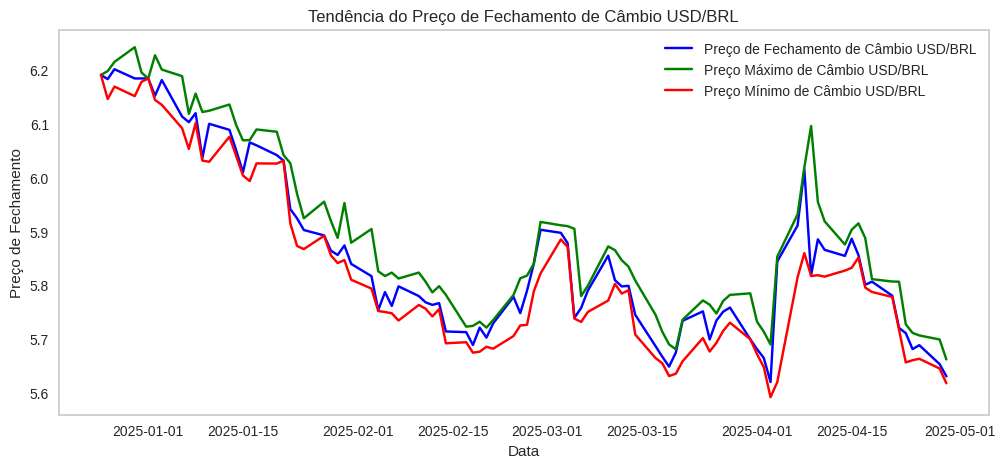

In [289]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['fx_close'], label='Preço de Fechamento de Câmbio USD/BRL', color='blue')
plt.plot(fx_btc_df.index, fx_btc_df['fx_high'], label='Preço Máximo de Câmbio USD/BRL', color='green')
plt.plot(fx_btc_df.index, fx_btc_df['fx_low'], label='Preço Mínimo de Câmbio USD/BRL', color='red')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Preço de Fechamento de Câmbio USD/BRL')
plt.legend()
plt.grid()
plt.show()

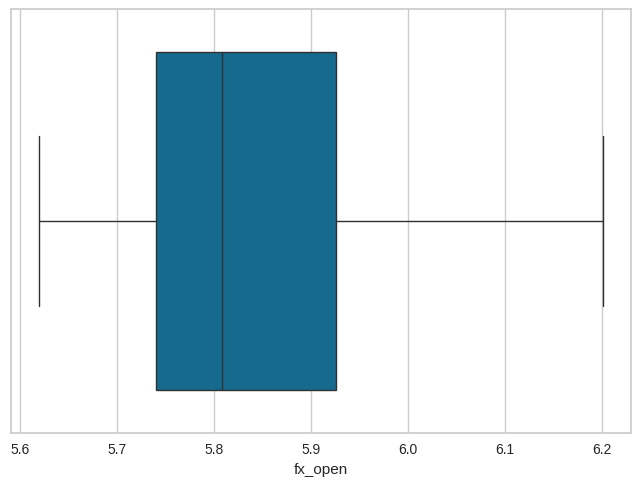

In [290]:
sns.boxplot(x=fx_btc_df['fx_open']);

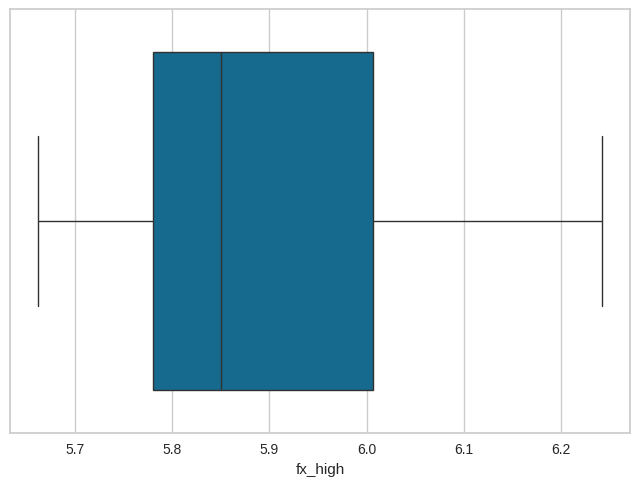

In [291]:
sns.boxplot(x=fx_btc_df['fx_high']);

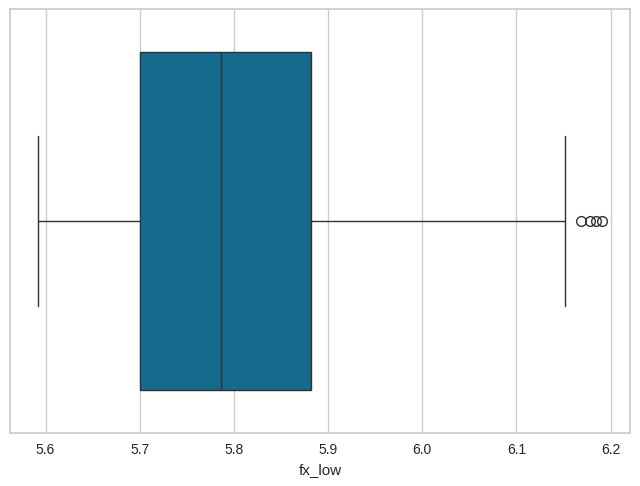

In [292]:
sns.boxplot(x=fx_btc_df['fx_low']);

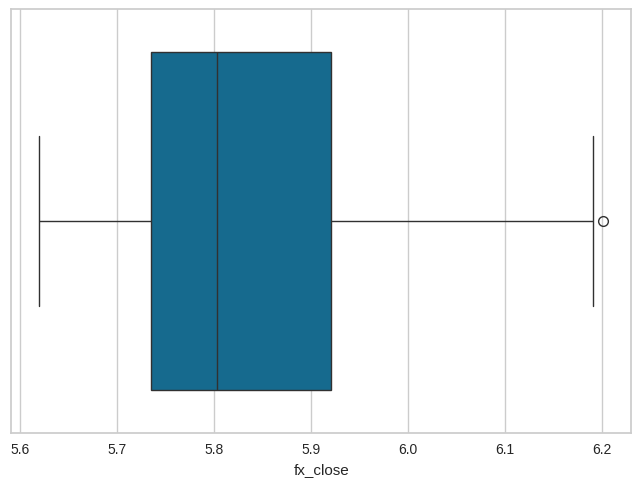

In [293]:
sns.boxplot(x=fx_btc_df['fx_close']);

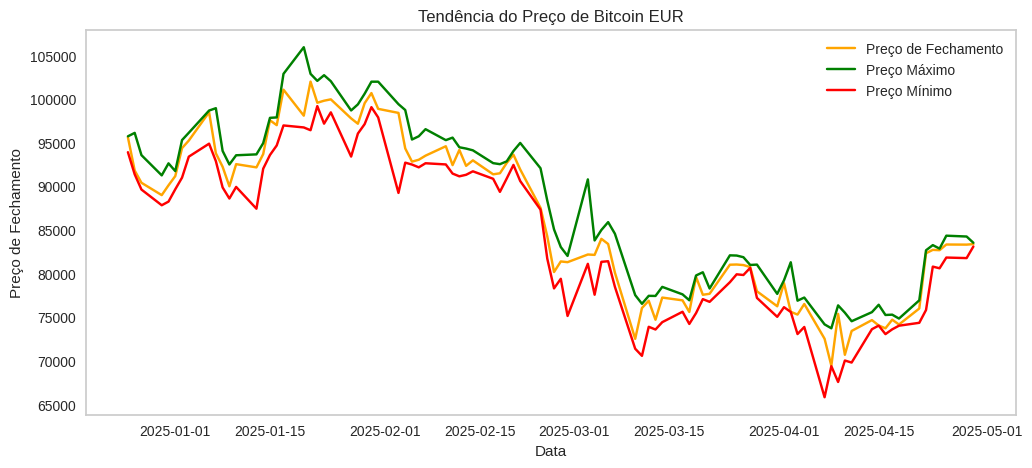

In [294]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['btc_close'], label='Preço de Fechamento', color='orange')
plt.plot(fx_btc_df.index, fx_btc_df['btc_high'], label='Preço Máximo', color='green')
plt.plot(fx_btc_df.index, fx_btc_df['btc_low'], label='Preço Mínimo', color='red')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Preço de Bitcoin EUR')
plt.legend()
plt.grid()
plt.show()

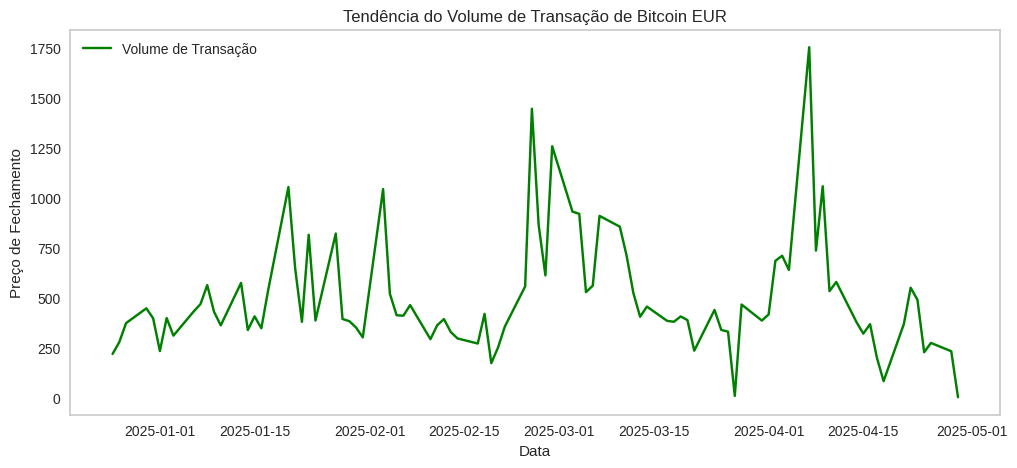

In [295]:
plt.figure(figsize=(12, 5))
plt.plot(fx_btc_df.index, fx_btc_df['btc_volume'], label='Volume de Transação', color='green')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Tendência do Volume de Transação de Bitcoin EUR')
plt.legend()
plt.grid()
plt.show()

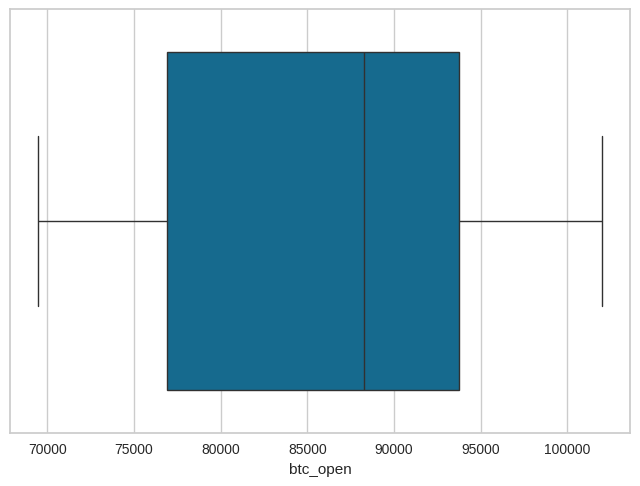

In [296]:
sns.boxplot(x=fx_btc_df['btc_open']);

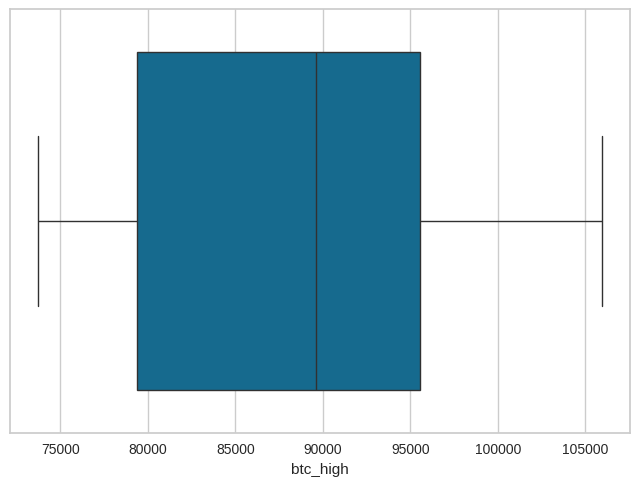

In [297]:
sns.boxplot(x=fx_btc_df['btc_high']);

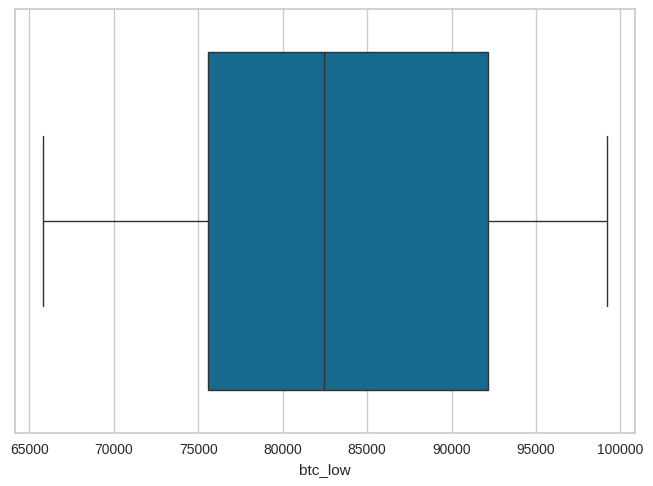

In [298]:
sns.boxplot(x=fx_btc_df['btc_low']);

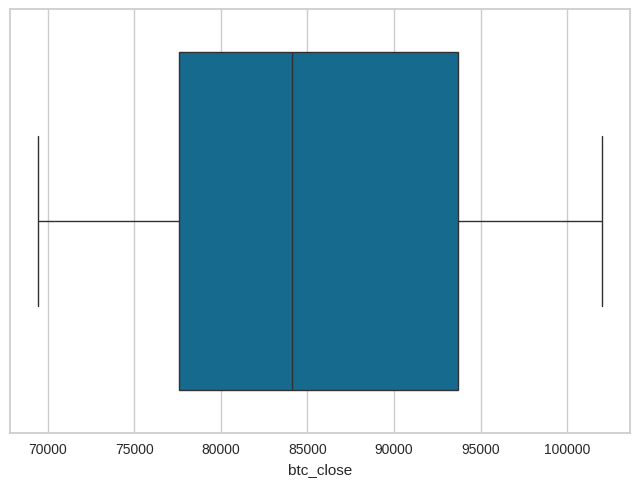

In [299]:
sns.boxplot(x=fx_btc_df['btc_close']);

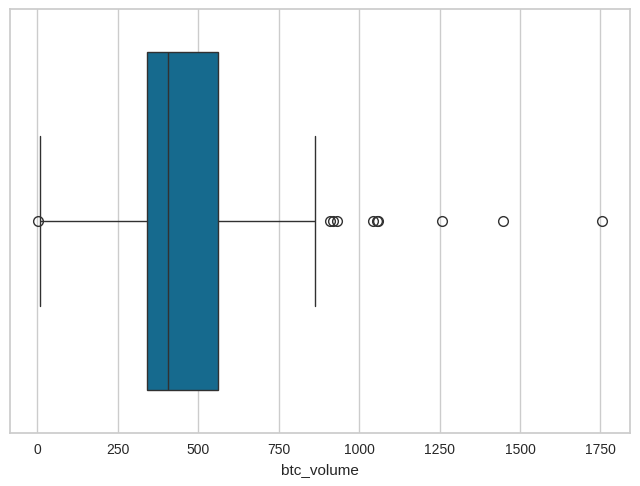

In [300]:
sns.boxplot(x=fx_btc_df['btc_volume']);

### Engenharia de Atributos

#### Variação do Câmbio USD/BRL

In [301]:
fx_btc_df['fx_variation'] = fx_btc_df['fx_close'].diff().shift(-1)
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation
2024-12-25,6.1906,6.1906,6.1906,6.1906,94890.99,95737.17,93915.29,95615.60,219.225452,-0.0078
2024-12-26,6.1738,6.1977,6.1458,6.1828,95618.45,96129.98,91380.00,91817.68,278.734919,0.0183
2024-12-27,6.1711,6.2148,6.1689,6.2011,91774.04,93579.09,89634.61,90412.16,373.718352,-0.0171
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000
...,...,...,...,...,...,...,...,...,...,...
2025-04-23,5.7201,5.7275,5.6568,5.7111,82339.52,83264.20,80800.00,82718.26,490.530568,-0.0296
2025-04-24,5.7111,5.7116,5.6609,5.6815,82741.42,82860.82,80606.52,82682.47,227.689742,0.0073
2025-04-25,5.6815,5.7069,5.6636,5.6888,82717.57,84344.93,81838.60,83332.80,274.473550,-0.0351
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0227


#### Variação do Bitcoin EUR

In [302]:
fx_btc_df['btc_variation'] = fx_btc_df['btc_close'].diff().shift(-1)
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation
2024-12-25,6.1906,6.1906,6.1906,6.1906,94890.99,95737.17,93915.29,95615.60,219.225452,-0.0078,-3797.92
2024-12-26,6.1738,6.1977,6.1458,6.1828,95618.45,96129.98,91380.00,91817.68,278.734919,0.0183,-1405.52
2024-12-27,6.1711,6.2148,6.1689,6.2011,91774.04,93579.09,89634.61,90412.16,373.718352,-0.0171,-1417.22
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,5.7201,5.7275,5.6568,5.7111,82339.52,83264.20,80800.00,82718.26,490.530568,-0.0296,-35.79
2025-04-24,5.7111,5.7116,5.6609,5.6815,82741.42,82860.82,80606.52,82682.47,227.689742,0.0073,650.33
2025-04-25,5.6815,5.7069,5.6636,5.6888,82717.57,84344.93,81838.60,83332.80,274.473550,-0.0351,-12.55
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0227,59.98


#### Média Móvel do Bitcoin EUR

In [303]:
fx_btc_df['btc_moving_average'] = fx_btc_df['btc_close'].shift(1).rolling(window=5).mean()
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
2024-12-25,6.1906,6.1906,6.1906,6.1906,94890.99,95737.17,93915.29,95615.60,219.225452,-0.0078,-3797.92,NaN
2024-12-26,6.1738,6.1977,6.1458,6.1828,95618.45,96129.98,91380.00,91817.68,278.734919,0.0183,-1405.52,NaN
2024-12-27,6.1711,6.2148,6.1689,6.2011,91774.04,93579.09,89634.61,90412.16,373.718352,-0.0171,-1417.22,NaN
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89,NaN
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,5.7201,5.7275,5.6568,5.7111,82339.52,83264.20,80800.00,82718.26,490.530568,-0.0296,-35.79,76186.144
2025-04-24,5.7111,5.7116,5.6609,5.6815,82741.42,82860.82,80606.52,82682.47,227.689742,0.0073,650.33,77984.392
2025-04-25,5.6815,5.7069,5.6636,5.6888,82717.57,84344.93,81838.60,83332.80,274.473550,-0.0351,-12.55,79578.278
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0227,59.98,81412.586


#### Tratamento de Valores Faltantes após Aplicação de Engenharia de Atributos

In [304]:
fx_btc_df.describe()

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,89.000000,89.000000,85.000000
mean,5.861504,5.895540,5.824110,5.855103,86230.907333,88151.990000,84154.005222,86244.932889,495.473474,-0.006288,-137.476067,86198.167882
std,0.162449,0.160384,0.161679,0.160355,9189.792361,9257.126341,9144.276975,9130.790967,287.046107,0.050917,2482.760030,9071.435790
min,5.620400,5.662300,5.592200,5.620400,69464.170000,73727.090000,65826.000000,69444.220000,2.788233,-0.196100,-7590.670000,72292.404000
25%,5.740925,5.780575,5.700425,5.735800,76893.767500,79370.820000,75605.725000,77598.955000,341.538078,-0.029600,-1715.890000,77793.136000
50%,5.808200,5.849900,5.786150,5.803850,88259.155000,89583.370000,82472.020000,84125.495000,407.141875,-0.011200,-35.790000,85063.366000
75%,5.926100,6.006600,5.882150,5.920975,93760.180000,95532.360000,92141.000000,93681.900000,563.080198,0.018300,1178.360000,93669.906000
max,6.201100,6.242000,6.190600,6.201100,101996.930000,105951.190000,99202.850000,102009.110000,1754.166989,0.223900,6338.240000,100120.086000


In [305]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-25 to 2025-04-29
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fx_open             90 non-null     float64
 1   fx_high             90 non-null     float64
 2   fx_low              90 non-null     float64
 3   fx_close            90 non-null     float64
 4   btc_open            90 non-null     float64
 5   btc_high            90 non-null     float64
 6   btc_low             90 non-null     float64
 7   btc_close           90 non-null     float64
 8   btc_volume          90 non-null     float64
 9   fx_variation        89 non-null     float64
 10  btc_variation       89 non-null     float64
 11  btc_moving_average  85 non-null     float64
dtypes: float64(12)
memory usage: 9.1 KB


In [306]:
fx_btc_df['fx_variation'] = fx_btc_df['fx_variation'].fillna(0)
fx_btc_df['btc_variation'] = fx_btc_df['btc_variation'].fillna(0)

In [307]:
prev_five_fx_btc_df = pd.merge(fx_df, btc_df, left_index=True, right_index=True, how='inner')
prev_five_fx_btc_df = prev_five_fx_btc_df.tail(95)
prev_five_fx_btc_df = prev_five_fx_btc_df.head(10)
prev_five_fx_btc_df['btc_moving_average'] = prev_five_fx_btc_df['4. close_y'].shift(1).rolling(window=5).mean()
prev_five_fx_btc_df = prev_five_fx_btc_df.tail(5)
prev_five_fx_btc_df

,1. open_x,2. high_x,3. low_x,4. close_x,1. open_y,2. high_y,3. low_y,4. close_y,5. volume,btc_moving_average
2024-12-25,6.19060,6.19060,6.19060,6.19060,94890.99000000,95737.17000000,93915.29000000,95615.60000000,219.22545179,94139.956
2024-12-26,6.17380,6.19770,6.14580,6.18280,95618.45000000,96129.98000000,91380.00000000,91817.68000000,278.73491900,93901.624
2024-12-27,6.17110,6.21480,6.16890,6.20110,91774.04000000,93579.09000000,89634.61000000,90412.16000000,373.71835226,93462.064
2024-12-30,6.20110,6.24200,6.15120,6.18400,89692.71000000,91260.41000000,87834.22000000,88994.94000000,447.55649032,92764.794
2024-12-31,6.18400,6.19500,6.17780,6.18400,89007.78000000,92638.09000000,88252.45000000,90119.83000000,397.73855381,92341.158


In [308]:
btc_moving_average_missed_values = prev_five_fx_btc_df['btc_moving_average'].iloc[:5].values
fx_btc_df.loc[fx_btc_df.index[:5], 'btc_moving_average'] = btc_moving_average_missed_values
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
2024-12-25,6.1906,6.1906,6.1906,6.1906,94890.99,95737.17,93915.29,95615.60,219.225452,-0.0078,-3797.92,94139.956
2024-12-26,6.1738,6.1977,6.1458,6.1828,95618.45,96129.98,91380.00,91817.68,278.734919,0.0183,-1405.52,93901.624
2024-12-27,6.1711,6.2148,6.1689,6.2011,91774.04,93579.09,89634.61,90412.16,373.718352,-0.0171,-1417.22,93462.064
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89,92764.794
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31,92341.158
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,5.7201,5.7275,5.6568,5.7111,82339.52,83264.20,80800.00,82718.26,490.530568,-0.0296,-35.79,76186.144
2025-04-24,5.7111,5.7116,5.6609,5.6815,82741.42,82860.82,80606.52,82682.47,227.689742,0.0073,650.33,77984.392
2025-04-25,5.6815,5.7069,5.6636,5.6888,82717.57,84344.93,81838.60,83332.80,274.473550,-0.0351,-12.55,79578.278
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0227,59.98,81412.586


In [309]:
fx_btc_df.describe()

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.861504,5.895540,5.824110,5.855103,86230.907333,88151.990000,84154.005222,86244.932889,495.473474,-0.006218,-135.948556,86593.931844
std,0.162449,0.160384,0.161679,0.160355,9189.792361,9257.126341,9144.276975,9130.790967,287.046107,0.050635,2468.815068,8965.839840
min,5.620400,5.662300,5.592200,5.620400,69464.170000,73727.090000,65826.000000,69444.220000,2.788233,-0.196100,-7590.670000,72292.404000
25%,5.740925,5.780575,5.700425,5.735800,76893.767500,79370.820000,75605.725000,77598.955000,341.538078,-0.029275,-1709.662500,77920.420000
50%,5.808200,5.849900,5.786150,5.803850,88259.155000,89583.370000,82472.020000,84125.495000,407.141875,-0.010800,-24.170000,90257.321000
75%,5.926100,6.006600,5.882150,5.920975,93760.180000,95532.360000,92141.000000,93681.900000,563.080198,0.018150,1173.470000,93831.010500
max,6.201100,6.242000,6.190600,6.201100,101996.930000,105951.190000,99202.850000,102009.110000,1754.166989,0.223900,6338.240000,100120.086000


In [310]:
fx_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2024-12-25 to 2025-04-29
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fx_open             90 non-null     float64
 1   fx_high             90 non-null     float64
 2   fx_low              90 non-null     float64
 3   fx_close            90 non-null     float64
 4   btc_open            90 non-null     float64
 5   btc_high            90 non-null     float64
 6   btc_low             90 non-null     float64
 7   btc_close           90 non-null     float64
 8   btc_volume          90 non-null     float64
 9   fx_variation        90 non-null     float64
 10  btc_variation       90 non-null     float64
 11  btc_moving_average  90 non-null     float64
dtypes: float64(12)
memory usage: 11.2 KB


#### Definição de Atributo Alvo (Traget)

In [311]:
def define_scenario(row):
    if abs(row['btc_variation']) < 0.015:
        return 'Neutral'
    elif row['btc_variation'] > 0 and row['fx_variation'] > 0:
        return 'Crypto-Friendly'
    elif row['btc_variation'] < 0 and row['fx_variation'] <= 0:
        return 'Conservative'
    else:
        return 'Other'

In [312]:
fx_btc_df['scenario'] = fx_btc_df.apply(define_scenario, axis=1)
fx_btc_df

,fx_open,fx_high,fx_low,fx_close,btc_open,btc_high,btc_low,btc_close,btc_volume,fx_variation,btc_variation,btc_moving_average,scenario
2024-12-25,6.1906,6.1906,6.1906,6.1906,94890.99,95737.17,93915.29,95615.60,219.225452,-0.0078,-3797.92,94139.956,Conservative
2024-12-26,6.1738,6.1977,6.1458,6.1828,95618.45,96129.98,91380.00,91817.68,278.734919,0.0183,-1405.52,93901.624,Other
2024-12-27,6.1711,6.2148,6.1689,6.2011,91774.04,93579.09,89634.61,90412.16,373.718352,-0.0171,-1417.22,93462.064,Conservative
2024-12-30,6.2011,6.2420,6.1512,6.1840,89692.71,91260.41,87834.22,88994.94,447.556490,0.0000,1124.89,92764.794,Other
2024-12-31,6.1840,6.1950,6.1778,6.1840,89007.78,92638.09,88252.45,90119.83,397.738554,0.0000,1055.31,92341.158,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,5.7201,5.7275,5.6568,5.7111,82339.52,83264.20,80800.00,82718.26,490.530568,-0.0296,-35.79,76186.144,Conservative
2025-04-24,5.7111,5.7116,5.6609,5.6815,82741.42,82860.82,80606.52,82682.47,227.689742,0.0073,650.33,77984.392,Crypto-Friendly
2025-04-25,5.6815,5.7069,5.6636,5.6888,82717.57,84344.93,81838.60,83332.80,274.473550,-0.0351,-12.55,79578.278,Conservative
2025-04-28,5.6865,5.6994,5.6455,5.6537,82686.69,84249.00,81776.11,83320.25,232.890225,-0.0227,59.98,81412.586,Other


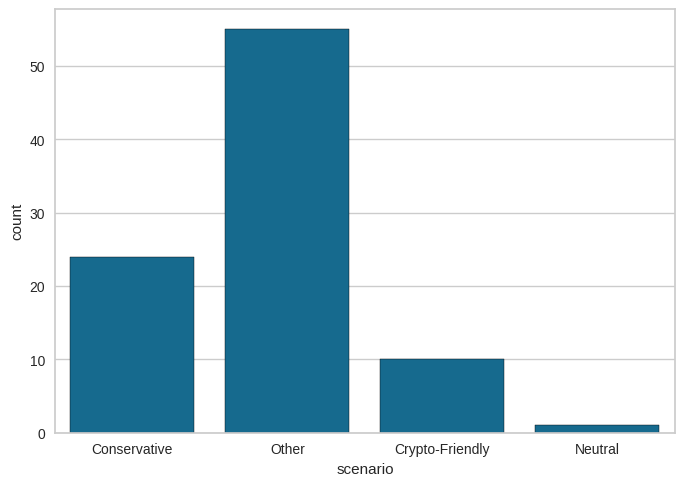

In [313]:
sns.countplot(x = fx_btc_df['scenario'], edgecolor = 'black');

### Normalização dos Dados

#### Separação de Atributos Preditores e Classe

In [314]:
x_fx_btc = fx_btc_df.iloc[:, 9:12].values
x_fx_btc.shape

(90, 3)

In [315]:
y_fx_btc = fx_btc_df.iloc[:, 12].values
y_fx_btc.shape

(90,)

#### Tratamento de Atributos Categóricos

In [316]:
# y_fx_btc = labelEncoder.fit_transform(y_fx_btc)
# y_fx_btc

#### Padronização dos Dados

In [317]:
x_fx_btc = standardScaler.fit_transform(x_fx_btc)

### Separação dos Dados de Treinamento e Teste

In [329]:
x_fx_btc_train, x_fx_btc_test, y_fx_btc_train, y_fx_btc_test = train_test_split(x_fx_btc, y_fx_btc, test_size=0.3, random_state=0)

### Conversão e Exportação de Arquivo para Ingestão Neural de Dados

In [330]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/fx_btc.pkl', mode='wb') as f:
  pickle.dump([x_fx_btc_train, x_fx_btc_test, y_fx_btc_train, y_fx_btc_test], f)

## Ingestão Baysidiana de Dados

### Importação de Bibliotecas

In [331]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

### Carregamento dos Dados para Ingestão Neural

In [332]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/fx_btc.pkl', 'rb') as f:
  x_fx_btc_train, x_fx_btc_test, y_fx_btc_train, y_fx_btc_test = pickle.load(f)

### Criação e Treinamento de Neurônio Artifial GaussianNB

In [333]:
gnb_fx_btc = GaussianNB()
gnb_fx_btc.fit(x_fx_btc_train, y_fx_btc_train)

GaussianNB()

### Teste e Métricas de Neurônio Artificial GaussianNB

In [334]:
gnb_fx_btc_predict = gnb_fx_btc.predict(x_fx_btc_test)

#### Acurácia e Eficácia

In [335]:
gnb_fx_btc_accuracy = accuracy_score(y_fx_btc_test, gnb_fx_btc_predict)
gnb_fx_btc_accuracy

0.7407407407407407

In [336]:
print('P(A) = ' + str(round((gnb_fx_btc_accuracy * 100), 2)) + '%')
pa = gnb_fx_btc_accuracy

P(A) = 74.07%


In [337]:
crypto_friendly= np.sum(y_fx_btc_test == "Crypto-Friendly")
pb = crypto_friendly / len(y_fx_btc_test)
print('P(B) = ' + str(round((pb * 100), 2)) + '%')

P(B) = 11.11%


In [338]:
pab = (pa * pb) / ((pa * pb) + ((1 - pa) * (1 - pb)))
print('P(A|B) = ' + str(round((pab * 100), 2)) + '%')

P(A|B) = 26.32%


#### Matriz Confusão

0.7407407407407407

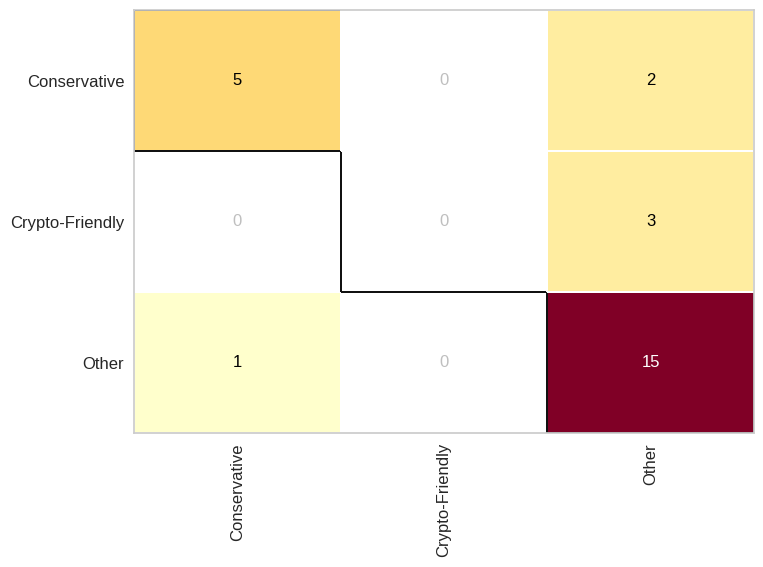

In [339]:
gnb_fx_btc_cm = ConfusionMatrix(gnb_fx_btc)
gnb_fx_btc_cm.fit(x_fx_btc_train, y_fx_btc_train)
gnb_fx_btc_cm.score(x_fx_btc_test, y_fx_btc_test)